<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/mmpose%E3%82%92%E8%A9%A6%E3%81%99_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mmpose を試す (3)

*   姿勢推定 MMPose
*   openmim なしでも使えるようだ

## 準備

In [1]:
!pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [2]:
!pip install mmdet mmcv mmpose -f https://download.openmmlab.com/mmcv/dist/cu121/torch2.4.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.4.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.3/452.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.0/436.0 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 17.8 MB/s eta 0:00:00
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58264 sha256=c7665c0547dab8bf6192603c9027d323e1cad266174f495385eae1bebd098ccd
  Stored in directory: /root/.cache/pip/wheels/e0/c1/ef/29ba7be03653a29ef6f2c3e1956d6c

### ソースコードを書き換える

In [3]:
%%writefile mmdet__init__.diff
--- a/__init__.py	2023-10-12 07:06:32.000000000 +0000
+++ b/__init__.py	2024-10-16 00:00:00.000000000 +0000
@@ -6,7 +6,7 @@ from mmengine.utils import digit_version
 from .version import __version__, version_info

 mmcv_minimum_version = '2.0.0rc4'
-mmcv_maximum_version = '2.2.0'
+mmcv_maximum_version = '2.3.0'
 mmcv_version = digit_version(mmcv.__version__)

 mmengine_minimum_version = '0.7.1'

Writing mmdet__init__.diff


In [4]:
!cd /usr/local/lib/python3.10/dist-packages/mmdet && patch -p1 < /content/mmdet__init__.diff

patching file __init__.py


## 必要なコードやサンプルデータをダウンロードする

In [5]:
!git clone --depth 1 https://github.com/open-mmlab/mmpose.git

Cloning into 'mmpose'...
remote: Enumerating objects: 2357, done.
remote: Counting objects: 100% (2357/2357), done.
remote: Compressing objects: 100% (1538/1538), done.
remote: Total 2357 (delta 1014), reused 1598 (delta 756), pack-reused 0 (from 0)
Receiving objects: 100% (2357/2357), 16.05 MiB | 28.69 MiB/s, done.
Resolving deltas: 100% (1014/1014), done.


## 2D pose detection

*   https://mmpose.readthedocs.io/en/latest/user_guides/inference.html#basic-usage

In [6]:
from mmpose.apis import MMPoseInferencer

inferencer = MMPoseInferencer('human')

/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth


Downloading: "https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth" to /root/.cache/torch/hub/checkpoints/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth


10/16 02:56:33 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


Downloading: "https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth" to /root/.cache/torch/hub/checkpoints/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


10/16 02:56:36 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


/usr/local/lib/python3.10/dist-packages/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/usr/local/lib/python3.10/dist-packages/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


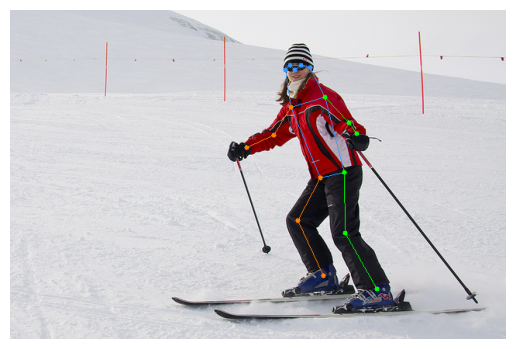

In [7]:
import matplotlib.pyplot as plt

img_path = 'mmpose/tests/data/coco/000000000785.jpg'

for result in inferencer(img_path, return_vis=True):
  image = result['visualization'][0]
  plt.imshow(image)
  plt.axis('off')
  plt.show()

## 3D pose detection

10/16 02:56:39 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/body_3d_keypoint/pose_lift/h36m/motionbert_ft_h36m-d80af323_20230531.pth


Downloading: "https://download.openmmlab.com/mmpose/v1/body_3d_keypoint/pose_lift/h36m/motionbert_ft_h36m-d80af323_20230531.pth" to /root/.cache/torch/hub/checkpoints/motionbert_ft_h36m-d80af323_20230531.pth


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
10/16 02:56:45 - mmengine - WARNING - The current default scope "mmpose" is not "mmdet", `init_default_scope` will force set the currentdefault scope to "mmdet".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


/usr/local/lib/python3.10/dist-packages/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/usr/local/lib/python3.10/dist-packages/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


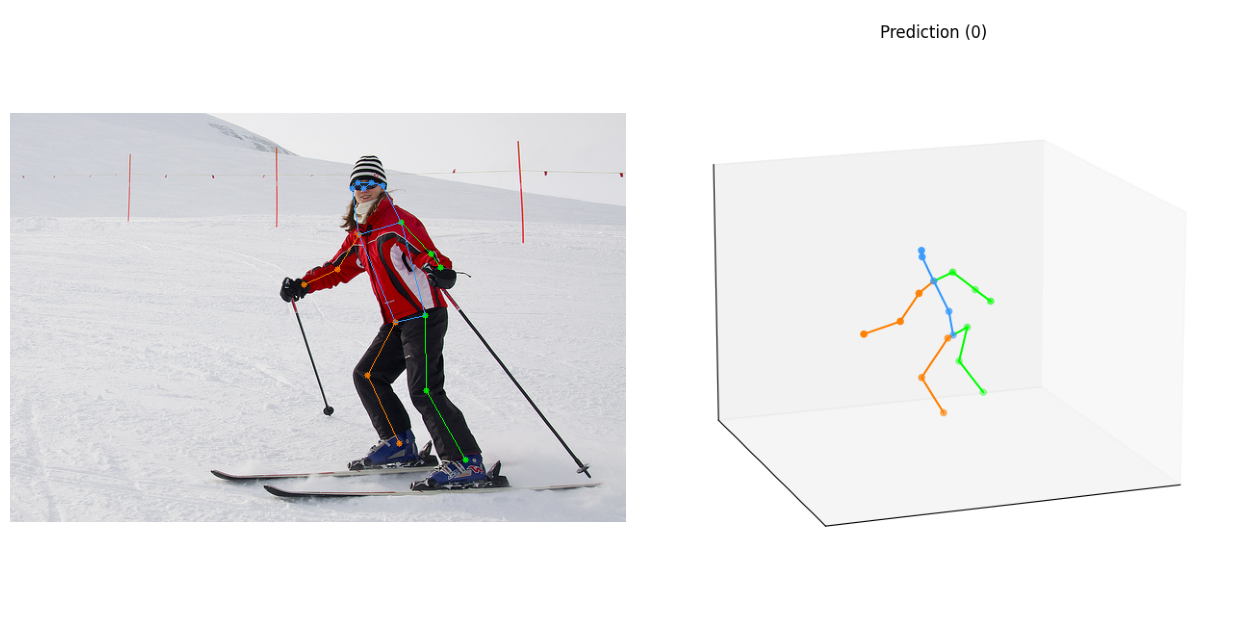

In [8]:
import matplotlib.pyplot as plt
from mmpose.apis import MMPoseInferencer

inferencer = MMPoseInferencer(pose3d='human3d')

img_path = 'mmpose/tests/data/coco/000000000785.jpg'

for result in inferencer(img_path, return_vis=True):
  image = result['visualization'][0]
  fig = plt.figure(figsize=(16, 8))
  plt.imshow(image)
  plt.axis('off')
  plt.show()